In [1]:

import seaborn as sns
import pandas as pd 
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk as nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

## reading the Data


In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploring Data analysis

In [3]:
disaster=df[df['target']==1]['target'].value_counts()
non_disaster=df[df['target']==0]['target'].value_counts()

In [4]:
data = pd.DataFrame([disaster,non_disaster])
data.index = ['disaster', 'non_disaster']
data

,0,1
disaster,NaN,3271.0
non_disaster,4342.0,NaN


1    41
0     6
Name: target, dtype: int64


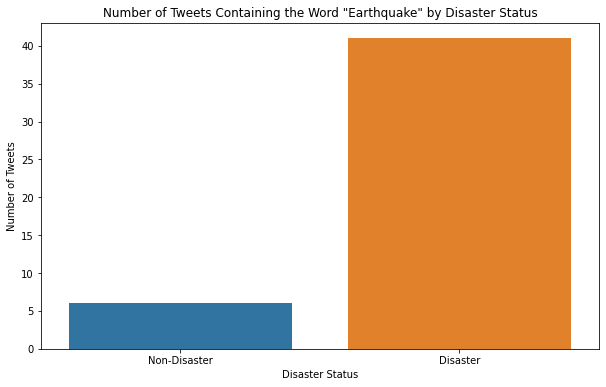

In [5]:

df['contains_earthquake'] = df['text'].str.contains('Earthquake', case=False, na=False)

earthquake_tweets = df[df['contains_earthquake']]

earthquake_disaster_counts = earthquake_tweets['target'].value_counts()

print(earthquake_disaster_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=earthquake_disaster_counts.index, y=earthquake_disaster_counts.values)
plt.title('Number of Tweets Containing the Word "Earthquake" by Disaster Status')
plt.xlabel('Disaster Status')
plt.ylabel('Number of Tweets')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

Number of Tweets Containing 'floods':
1    40
0    15
Name: target, dtype: int64


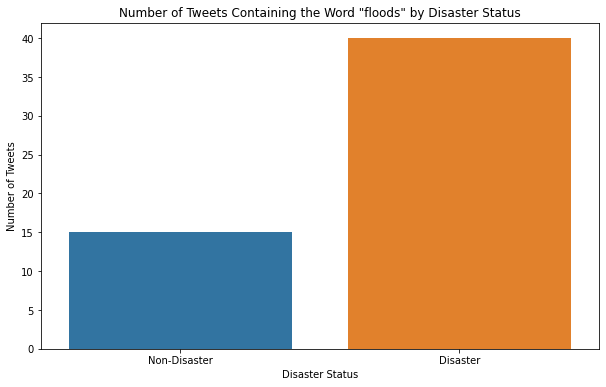

In [6]:
df['contains_floods'] = df['text'].str.contains('floods', case=False, na=False)

floods_tweets = df[df['contains_floods']]

floods_disaster_counts = floods_tweets['target'].value_counts()

print("Number of Tweets Containing 'floods':")
print(floods_disaster_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=floods_disaster_counts.index, y=floods_disaster_counts.values)
plt.title('Number of Tweets Containing the Word "floods" by Disaster Status')
plt.xlabel('Disaster Status')
plt.ylabel('Number of Tweets')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

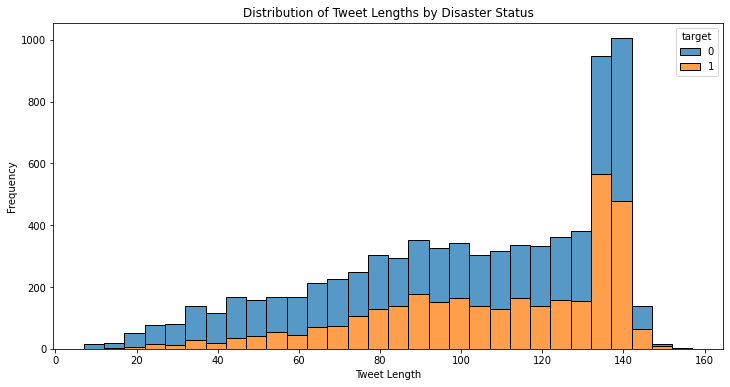

In [7]:

df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tweet_length', hue='target', multiple='stack', bins=30)
plt.title('Distribution of Tweet Lengths by Disaster Status')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

### Common words in "Disaster Tweets" & "Non-Disaster Tweets"

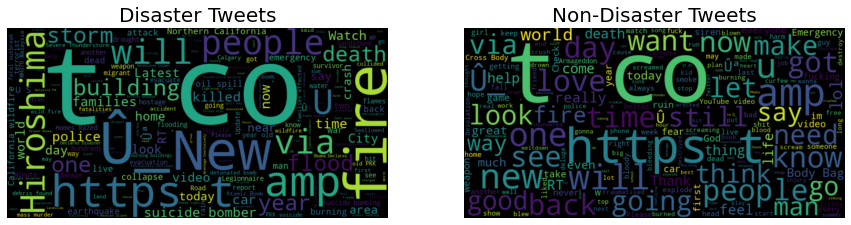

In [8]:
from wordcloud import WordCloud
disaster_tweets = df[df['target'] == 1]
non_disaster_tweets = df[df['target'] == 0]

disaster_words = ' '.join(disaster_tweets['text'])
non_disaster_words = ' '.join(non_disaster_tweets['text'])

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
disaster_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(disaster_words)
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Disaster Tweets', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(non_disaster_words)
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Non-Disaster Tweets', fontsize=20)
plt.axis('off')

plt.show()

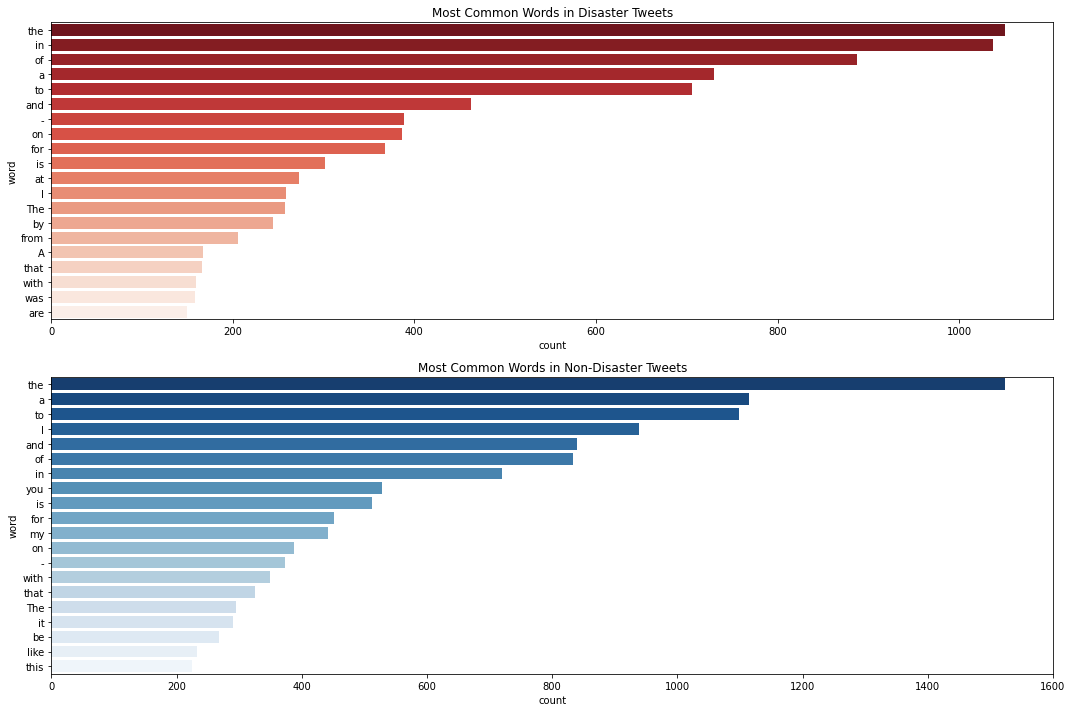

In [9]:
from collections import Counter

disaster_common_words = Counter(" ".join(disaster_tweets["text"]).split()).most_common(20)
non_disaster_common_words = Counter(" ".join(non_disaster_tweets["text"]).split()).most_common(20)

disaster_common_df = pd.DataFrame(disaster_common_words, columns=['word', 'count'])
non_disaster_common_df = pd.DataFrame(non_disaster_common_words, columns=['word', 'count'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='count', y='word', data=disaster_common_df, palette='Reds_r')
plt.title('Most Common Words in Disaster Tweets')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='word', data=non_disaster_common_df, palette='Blues_r')
plt.title('Most Common Words in Non-Disaster Tweets')

plt.tight_layout()
plt.show()


## Data preprocessing

In [10]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    return text

stop_words = set(stopwords.words("english"))
more_stopwords = {"u", "im", "c",'#'}
stop_words = stop_words.union(more_stopwords)

def remove_stopwords(text):
    text = " ".join(word for word in text.split(" ") if word not in stop_words)
    return text

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = " ".join(stemmer.stem(word) for word in text.split(" "))
    return text

In [11]:

df["text"]=df["text"].apply(clean_text)
df["text"]=df["text"].apply(remove_stopwords)
df["text"]=df["text"].apply(stemm_text)
df.head()

,id,keyword,location,text,target,contains_earthquake,contains_floods,tweet_length
0,1,NaN,NaN,deed reason #earthquak may allah forgiv us,1,True,False,69
1,4,NaN,NaN,forest fire near la rong sask. canada,1,False,False,38
2,5,NaN,NaN,resid ask shelter place notifi officers. evacu...,1,False,False,133
3,6,NaN,NaN,"13,000 peopl receiv #wildfir evacu order calif...",1,False,False,65
4,7,NaN,NaN,got sent photo rubi #alaska smoke #wildfir pou...,1,False,False,88


In [12]:
df["tokens"] = df["text"].apply(lambda x: [word for word in word_tokenize(x) if word != '#'])
df.head()

,id,keyword,location,text,target,contains_earthquake,contains_floods,tweet_length,tokens
0,1,NaN,NaN,deed reason #earthquak may allah forgiv us,1,True,False,69,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,NaN,NaN,forest fire near la rong sask. canada,1,False,False,38,"[forest, fire, near, la, rong, sask, ., canada]"
2,5,NaN,NaN,resid ask shelter place notifi officers. evacu...,1,False,False,133,"[resid, ask, shelter, place, notifi, officers,..."
3,6,NaN,NaN,"13,000 peopl receiv #wildfir evacu order calif...",1,False,False,65,"[13,000, peopl, receiv, wildfir, evacu, order,..."
4,7,NaN,NaN,got sent photo rubi #alaska smoke #wildfir pou...,1,False,False,88,"[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [13]:
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head(5)

,id,keyword,location,text,target,contains_earthquake,contains_floods,tweet_length,tokens
0,1,NaN,NaN,deed reason #earthquak may allah forgiv us,1,True,False,69,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,forest fire near la rong sask. canada,1,False,False,38,forest fire near la rong sask . canada
2,5,NaN,NaN,resid ask shelter place notifi officers. evacu...,1,False,False,133,resid ask shelter place notifi officers . evac...
3,6,NaN,NaN,"13,000 peopl receiv #wildfir evacu order calif...",1,False,False,65,"13,000 peopl receiv wildfir evacu order califo..."
4,7,NaN,NaN,got sent photo rubi #alaska smoke #wildfir pou...,1,False,False,88,got sent photo rubi alaska smoke wildfir pour ...


In [14]:
df = df.drop(columns=['id', 'keyword', 'location', 'text'])
df.head(5)

,target,contains_earthquake,contains_floods,tweet_length,tokens
0,1,True,False,69,deed reason earthquak may allah forgiv us
1,1,False,False,38,forest fire near la rong sask . canada
2,1,False,False,133,resid ask shelter place notifi officers . evac...
3,1,False,False,65,"13,000 peopl receiv wildfir evacu order califo..."
4,1,False,False,88,got sent photo rubi alaska smoke wildfir pour ...


In [15]:
df.isnull().sum()

target                 0
contains_earthquake    0
contains_floods        0
tweet_length           0
tokens                 0
dtype: int64

## Building The Model

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tokens']).toarray()

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")

Training and testing data prepared.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [18]:
model = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
param_grid = {
    'n_estimators': [100],
    'max_features': ['auto', 'log2'],
    'max_depth': [None],

}

In [19]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {round( ( random_search.score(X_train,y_train)*100 ) , 2 )}%')
print(f'Test Accuracy: {accuracy:.4f}')

c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train Accuracy: 98.7%
Test Accuracy: 0.7879


Multinomial Naive Bayes selected with accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



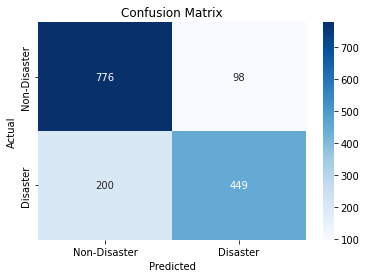

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
if lr_accuracy > nb_accuracy:
    best_model = lr_model
    print(f"Logistic Regression selected with accuracy: {lr_accuracy:.2f}")
else:
    best_model = nb_model
    print(f"Multinomial Naive Bayes selected with accuracy: {nb_accuracy:.2f}")

y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:

model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {model_filename}")


Best model saved to best_model.pkl


## Preprocess_Function

In [22]:
def preprocess_text(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = stemm_text(text)
    
    tokens = word_tokenize(text)
    text = ' '.join(tokens)
    
    return text


In [23]:

df_test = pd.read_csv("test.csv")
df_test['text'] = df_test['text'].apply(preprocess_text)

In [24]:
df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,"heard # earthquak differ cities , stay safe ev..."
2,3,NaN,NaN,"forest fire spot pond , gees flee across stree..."
3,9,NaN,NaN,apocalyps lighting . # spokan # wildfir
4,11,NaN,NaN,typhoon soudelor kill 28 china taiwan


## Submission_File

In [25]:

X_test = vectorizer.transform(df_test['text'])
test_predictions = best_model.predict(X_test)
submission = pd.DataFrame({
    'id': df_test['id'],
    'target': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

    
    
    

Submission file created: submission.csv
